In [1]:
import numpy as np
import os
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from os.path import join
import PIL
from PIL import Image, ImageOps
import cv2
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB




In [10]:
# Extract histogram from one image

def extract_hist(img):
    color = ('b','g','r')
    histogram = np.empty([3,256])
    for channel,col in enumerate(color):
        histr = cv2.calcHist([np.asarray(img)],[channel],None,[256],[0,256])
        histogram[channel] = np.transpose(histr)
    return histogram.ravel()

In [22]:
def plot_hist(img):
    color = ('b','g','r')
    for histr,col in zip(np.split(img,3),color):
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.show()

In [4]:
# import car images from natural images
img_dir_dist = "./image_dataset/0"
img_dir_good = "./image_dataset/1"
img_paths_dist = [join(img_dir_dist,filename) for filename in os.listdir(img_dir_dist)]
img_paths_good = [join(img_dir_good,filename) for filename in os.listdir(img_dir_good)]

In [11]:
X = np.zeros((len(img_paths_dist) + len(img_paths_good),768), dtype=int)
y = []
i = 0

for image in img_paths_dist:
    X[i] = extract_hist(Image.open( image ))
    y.append(0)
    i+=1

for image in img_paths_good:
    X[i] = extract_hist(Image.open( image ))
    y.append(1)
    i+=1
    

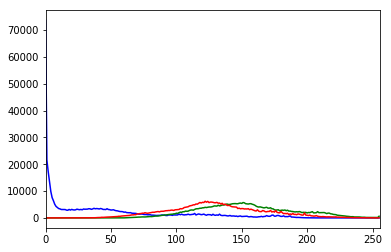

In [21]:
plot_hist(X[9])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [50]:
kf = KFold(n_splits=10, shuffle=True, random_state=False)
gnb = GaussianNB()
gnb.fit(X_train,y_train)
print('Accuracy',gnb.score(X_test,y_test))
print('Precision',np.mean(cross_val_score(gnb, X, y, cv=kf, scoring='precision')))

Accuracy 1.0
Precision 0.9586908260754201
